In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
from matplotlib import pylab as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [3]:
trainset = torchvision.datasets.CIFAR10('../data', train=True, transform=transform, download=True)
testset = torchvision.datasets.CIFAR10('../data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(trainset)

50000

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [6]:
def showImg(img):
    img = img * 0.5 + 0.5
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)

In [7]:
trainIter = iter(trainloader)
imgs, labels = next(trainIter)

truck,cat,deer,automobile


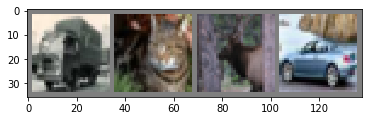

In [8]:
print(','.join([trainset.classes[label] for label in labels]))
showImg(torchvision.utils.make_grid(imgs))

In [9]:
imgs[0].size()

torch.Size([3, 32, 32])

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(16 * 8 * 8, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2, 2)
        x = self.flatten(x)
        x = self.fc3(x)
        return x

In [11]:
net = Net()

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
history_loss = []

for epoch in range(1):
    for step, data in enumerate(trainloader):
        imgs, labels = data
        outputs = net(imgs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 1000 == 999:
            print(f'epoch: {epoch + 1} -- step: {step + 1} -- loss: {loss: .4f}')
            history_loss.append(loss)

epoch: 1 -- step: 1000 -- loss:  2.2614
epoch: 1 -- step: 2000 -- loss:  2.0765
epoch: 1 -- step: 3000 -- loss:  1.2996
epoch: 1 -- step: 4000 -- loss:  1.2604
epoch: 1 -- step: 5000 -- loss:  1.0762
epoch: 1 -- step: 6000 -- loss:  0.4273
epoch: 1 -- step: 7000 -- loss:  1.7161
epoch: 1 -- step: 8000 -- loss:  1.1844
epoch: 1 -- step: 9000 -- loss:  1.3384
epoch: 1 -- step: 10000 -- loss:  0.8565
epoch: 1 -- step: 11000 -- loss:  1.4360
epoch: 1 -- step: 12000 -- loss:  2.9640


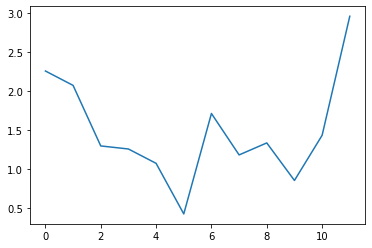

In [14]:
plt.plot(history_loss)

In [38]:
correct = 0
total = 0
class_correct = np.zeros(10)
class_total = np.zeros(10)

with torch.no_grad():
    for imgs, labels in testloader:
        outputs = net(imgs)
        predicts = torch.argmax(outputs, 1)
        c = (predicts == labels).squeeze()
        
        total += labels.size()[0]
        correct += c.sum().item()
        
        for label, item_correct in zip(labels.squeeze().numpy(), c.numpy()):
            class_correct[label] += item_correct
            class_total[label] += 1

        
accuracy = correct / total
class_accuracy = class_correct / class_total

print(f'total accuracy: {accuracy}')

print(f"classes accuracy: {', '.join([trainset.classes[i] + ': ' + str(class_accuracy[i]) for i in range(10)])}")

total accuracy: 0.5527
classes accuracy: airplane: 0.657, automobile: 0.684, bird: 0.386, cat: 0.399, deer: 0.618, dog: 0.564, frog: 0.437, horse: 0.559, ship: 0.679, truck: 0.544
